In [1]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
import numpy as np 
import re
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
with open ("pandp.txt", "r") as myfile:
  data=myfile.read().replace("\n", " ")
data = (data).split(". ")
input_seq = []
for i in range(len(data)):
    sent = re.sub(r'[^\w\s]', '', data[i]) 
    sent = sent.lower()
    sent = sent.split()
    input_seq.append(sent)
(input_seq[0])

['chapter',
 '1',
 'it',
 'is',
 'a',
 'truth',
 'universally',
 'acknowledged',
 'that',
 'a',
 'single',
 'man',
 'in',
 'possession',
 'of',
 'a',
 'good',
 'fortune',
 'must',
 'be',
 'in',
 'want',
 'of',
 'a',
 'wife']

In [3]:
sentences = []
for sentence in input_seq:
	for i in range(1, len(sentence)):
		n_gram_sequence = sentence[:i+1]
		sentences.append(n_gram_sequence)

In [4]:
all_words = []
for sentence in (sentences):
  for word in sentence:
     word = re.sub(r'[^\w\s]', '', word) 
     word = word.lower()
     all_words.append(word)

all_words = list(set(all_words))
len(all_words)

6940

In [5]:
def word_dict(all_words):
    word_dict = {}
    for idx, words in enumerate(all_words):
        word_dict[words] = idx+1
    return word_dict

max_sequence_len = max([len(x) for x in sentences])
def bag_of_word(tokenize_sen,wordict):
    bg_token = np.zeros((max_sequence_len))
    for idx,token in enumerate(tokenize_sen):
        if token in wordict.keys():
            bg_token[max_sequence_len - len(tokenize_sen)+idx] = wordict[token]   #prepadding
        else:
            bg_token[idx]= -1.0     # assign -1 to words not present in allwords
    return bg_token
max_sequence_len

166

In [6]:
word_index = word_dict(all_words=all_words)
tokenized = []
for sentence in sentences:
  tokenized.append(bag_of_word(sentence, word_index))

# #Now sentences are prepadded and tokenized
tokenized_sen_num = np.array(tokenized)

In [7]:
xs, labels = tokenized_sen_num[:,:-1],tokenized_sen_num[:,-1]
(tokenized_sen_num).shape
ys = tf.keras.utils.to_categorical(labels, num_classes=len(all_words)+1)

In [8]:
with tf.device('/gpu:0'):
  model = Sequential()
  model.add(Embedding(len(all_words)+1, 128, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(64)))
  model.add(Dense(len(all_words)+1, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=160, verbose=1)

Epoch 1/160
3636/3636 [==============================] - 84s 22ms/step - loss: 6.4857 - accuracy: 0.0528
Epoch 2/160
3636/3636 [==============================] - 81s 22ms/step - loss: 5.5244 - accuracy: 0.1178
Epoch 3/160
3636/3636 [==============================] - 80s 22ms/step - loss: 5.1353 - accuracy: 0.1455
Epoch 4/160
3636/3636 [==============================] - 79s 22ms/step - loss: 4.8686 - accuracy: 0.1631
Epoch 5/160
3636/3636 [==============================] - 79s 22ms/step - loss: 4.6861 - accuracy: 0.1742
Epoch 6/160
3636/3636 [==============================] - 76s 21ms/step - loss: 4.4962 - accuracy: 0.1877
Epoch 7/160
3636/3636 [==============================] - 76s 21ms/step - loss: 4.3455 - accuracy: 0.1968
Epoch 8/160
3636/3636 [==============================] - 83s 23ms/step - loss: 4.2097 - accuracy: 0.2084
Epoch 9/160
3636/3636 [==============================] - 79s 22ms/step - loss: 4.0794 - accuracy: 0.2196
Epoch 10/160
3636/3636 [==============================]

3636/3636 [==============================] - 78s 21ms/step - loss: 1.7348 - accuracy: 0.6093
Epoch 79/160
3636/3636 [==============================] - 77s 21ms/step - loss: 1.7213 - accuracy: 0.6122
Epoch 80/160
3636/3636 [==============================] - 77s 21ms/step - loss: 1.7261 - accuracy: 0.6115
Epoch 81/160
3636/3636 [==============================] - 78s 21ms/step - loss: 1.7057 - accuracy: 0.6153
Epoch 82/160
3636/3636 [==============================] - 78s 21ms/step - loss: 1.7073 - accuracy: 0.6157
Epoch 83/160
3636/3636 [==============================] - 82s 22ms/step - loss: 1.6854 - accuracy: 0.6208
Epoch 84/160
3636/3636 [==============================] - 86s 24ms/step - loss: 1.6840 - accuracy: 0.6163
Epoch 85/160
3636/3636 [==============================] - 81s 22ms/step - loss: 1.6733 - accuracy: 0.6196
Epoch 86/160
3636/3636 [==============================] - 81s 22ms/step - loss: 1.6673 - accuracy: 0.6214
Epoch 87/160
3636/3636 [==============================] - 8

3636/3636 [==============================] - 83s 23ms/step - loss: 1.3519 - accuracy: 0.6805
Epoch 155/160
3636/3636 [==============================] - 83s 23ms/step - loss: 1.3331 - accuracy: 0.6846
Epoch 156/160
3636/3636 [==============================] - 85s 23ms/step - loss: 1.3422 - accuracy: 0.6819
Epoch 157/160
3636/3636 [==============================] - 95s 26ms/step - loss: 1.3338 - accuracy: 0.6836
Epoch 158/160
3636/3636 [==============================] - 86s 24ms/step - loss: 1.3452 - accuracy: 0.6818
Epoch 159/160
3636/3636 [==============================] - 87s 24ms/step - loss: 1.3457 - accuracy: 0.6815
Epoch 160/160
3636/3636 [==============================] - 85s 23ms/step - loss: 1.3175 - accuracy: 0.6878


In [9]:
model.save("predict-next")

INFO:tensorflow:Assets written to: predict-next/assets


INFO:tensorflow:Assets written to: predict-next/assets


In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

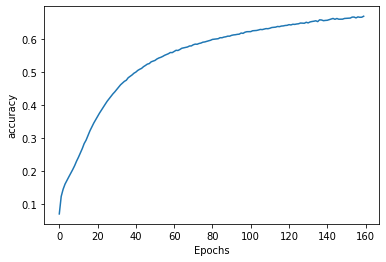

In [11]:
plot_graphs(history, 'accuracy')

In [12]:
input_text = "how are"
next_words = 1

input_text = str(input_text).lower()
input_text = input_text.split()
inp = bag_of_word(input_text, word_index)
inp = np.reshape(inp,(1,166))
predict = model.predict(inp, verbose=0)
predicted = np.argmax(predict,axis=1)

output_word = ""
for word, idx in word_index.items():
    if idx == predicted:
      output_word = (word)


In [13]:
output_word #Predicted word

'you'

In [14]:
input_text = "why are you like"
next_words = 1

input_text = str(input_text).lower()
input_text = input_text.split()
inp = bag_of_word(input_text, word_index)
inp = np.reshape(inp,(1,166))
predict = model.predict(inp, verbose=0)
predicted = np.argmax(predict,axis=1)

output_word = ""
for word, idx in word_index.items():
    if idx == predicted:
      output_word = (word)

In [15]:
output_word

'him'